# **Hospital Length of Stay (LOS) Prediction**

## **Context:**

Hospital management is a vital area that gained a lot of attention during the COVID-19 pandemic. **Inefficient distribution of resources like beds, ventilators might lead to a lot of complications**. However, this can be mitigated by **predicting the length of stay (LOS) of a patient before getting admitted**. Once this is determined, the hospital can plan a suitable treatment, resources, and staff to reduce the LOS and increase the chances of recovery. The rooms and bed can also be planned in accordance with that.

**HealthPlus hospital has been incurring a lot of losses in revenue and life due to its inefficient management system.** They have been unsuccessful in allocating pieces of equipment, beds, and hospital staff fairly. **A system that could estimate the length of stay (LOS) of a patient can solve this problem to a great extent.**

## **Objective:**

As a Data Scientist, you have been hired by HealthPlus to analyze the data, find out **what factors affect the LOS the most, and come up with a machine learning model which can predict the LOS of a patient** using the data available during admission and after running a few tests. Also, **bring about useful insights and policies from the data, which can help the hospital to improve their health care infrastructure and revenue.**

## **Data Dictionary:**

The data contains various information recorded during the time of admission of the patient. It only contains **records of patients who were admitted to the hospital.** The detailed data dictionary is given below:


* **patientid**: Patient ID
* **Age**: Range of age of the patient
* **gender**: Gender of the patient
* **Type of Admission**: Trauma, emergency or urgent
* **Severity of Illness**: Extreme, moderate, or minor
* **health_condition**s: Any previous health conditions suffered by the patient
* **Visitors with Patient**: The number of patients who accompany the patient
* **Insurance**: Does the patient have health insurance or not?
* **Admission_Deposit**: The deposit paid by the patient during admission
* **Stay (in days)**: The number of days that the patient has stayed in the hospital. This is the **target variable**
* **Available Extra Rooms in Hospital**: The number of rooms available during admission
* **Department**: The department which will be treating the patient
* **Ward_Facility_Code**: The code of the ward facility in which the patient will be admitted
* **doctor_name**: The doctor who will be treating the patient
* **staff_available**: The number of staff who are not occupied at the moment in the ward

## **Approach to solve the problem:**

1. Import the necessary libraries
2. Read the dataset and get an overview
3. Exploratory data analysis - a. Univariate b. Bivariate
4. Data preprocessing if any
5. Define the performance metric and build ML models
6. Checking for assumptions
7. Compare models and determine the best one
8. Observations and business insights

## **Importing Libraries**

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

In [8]:
# Read the healthcare dataset file
data = pd.read_csv("healthcare_data.csv")

In [9]:
# Copying data to another variable to avoid any changes to original data
same_data = data.copy()

## **Data Overview**

In [11]:
# View the first 5 rows of the dataset
data.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,NaN,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [12]:
# View the last 5 rows of the dataset
data.tail()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
499995,4,gynecology,F,Dr Sarah,2,43001,11-20,Female,Trauma,Minor,High Blood Pressure,3,No,4105.795901,10
499996,13,gynecology,F,Dr Olivia,8,85601,31-40,Female,Emergency,Moderate,Other,2,No,4631.550257,11
499997,2,gynecology,B,Dr Sarah,3,22447,11-20,Female,Emergency,Moderate,High Blood Pressure,2,No,5456.930075,8
499998,2,radiotherapy,A,Dr John,1,29957,61-70,Female,Trauma,Extreme,Diabetes,2,No,4694.127772,23
499999,3,gynecology,F,Dr Sophia,3,45008,41-50,Female,Trauma,Moderate,Heart disease,4,Yes,4713.868519,10


In [13]:
# Understand the shape of the data
data.shape

(500000, 15)

- The dataset has **5,00,000 rows and 15 columns.**

In [14]:
# Checking the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   patientid                          500000 non-null  int64  
 6   Age                                500000 non-null  object 
 7   gender                             500000 non-null  object 
 8   Type of Admission                  500000 non-null  object 
 9   Severity of Illness                500000 non-null  object 
 10  health_conditions                  348112 non-null  object 
 11  Visitors with Patient              5000

**Observations:**

-  Available Extra Rooms in Hospital, staff_available, patientid, Visitors with Patient, Admission_Deposit, and Stay (in days) are of **numeric data type** and the rest of the columns are of **object data type**.
- The number of non-null values is the same as the total number of entries in the data, i.e., **there are no null values.**
- The column patientid is an identifier for patients in the data. This column will not help with our analysis so we can drop it.

In [15]:
# To view patientid and the number of times they have been admitted to the hospital
data['patientid'].value_counts()

patientid
126719    21
125695    21
44572     21
126623    21
125625    19
          ..
37634      1
91436      1
118936     1
52366      1
105506     1
Name: count, Length: 126399, dtype: int64

**Observation:**

- **The maximum number of times the same patient admitted to the hospital is 21 and minimum is 1.**

In [27]:
# Dropping patientid from the data as it is an identifier and will not add value to the analysis
data=data.drop(columns=["patientid"])

In [28]:
# Checking for duplicate values in the data
data.duplicated().sum()

0

**Observation:** 
- Data contains unique rows. There is no need to remove any rows.

In [16]:
# Checking the descriptive statistics of the columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Available Extra Rooms in Hospital,500000.0,3.638800,2.698124,0.000000,2.000000,3.000000,4.000000,24.00000
staff_available,500000.0,5.020470,3.158103,0.000000,2.000000,5.000000,8.000000,10.00000
patientid,500000.0,63150.519058,41689.479956,-3269.000000,25442.000000,57864.000000,103392.000000,134400.00000
Visitors with Patient,500000.0,3.549414,2.241054,0.000000,2.000000,3.000000,4.000000,32.00000
Admission_Deposit,500000.0,4722.315734,1047.324220,1654.005148,4071.714532,4627.003792,5091.612717,10104.72639
Stay (in days),500000.0,12.381062,7.913174,3.000000,8.000000,9.000000,11.000000,51.00000


**Observations:**

* There are around **3 rooms available in the hospital on average** and there are times when the hospital is full and there are no rooms available (minimum value is 0). The **maximum number of rooms available in the hospital is 24**.
* **On average, there are around 5 staff personnel available to treat the new patients** but it can also be zero at times. The maximum number of staff available in the hospital is 10.
* **On average, around 3 visitors accompany the patient.** Some patients come on their own (minimum value is zero) and a few cases have 32 visitors. It will be interesting to see if there is any relationship between the number of visitors and the severity of the patient.
* **The average admission deposit lies around 4,722 dollars and a minimum of 1,654 dollars is paid on every admission.**
* **Patient's stay ranges from 3 to 51 days.** There might be outliers in this variable. The median length of stay is 9 days.

In [17]:
# List of all important categorical variables
cat_col = ["Department", "Type of Admission", 'Severity of Illness', 'gender', 'Insurance', 'health_conditions', 'doctor_name', "Ward_Facility_Code", "Age"]

# Printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts(1))
    print("-" * 50)

Department
gynecology            0.686956
radiotherapy          0.168630
anesthesia            0.088358
TB & Chest disease    0.045780
surgery               0.010276
Name: proportion, dtype: float64
--------------------------------------------------
Type of Admission
Trauma       0.621072
Emergency    0.271568
Urgent       0.107360
Name: proportion, dtype: float64
--------------------------------------------------
Severity of Illness
Moderate    0.560394
Minor       0.263074
Extreme     0.176532
Name: proportion, dtype: float64
--------------------------------------------------
gender
Female    0.74162
Male      0.20696
Other     0.05142
Name: proportion, dtype: float64
--------------------------------------------------
Insurance
Yes    0.78592
No     0.21408
Name: proportion, dtype: float64
--------------------------------------------------
health_conditions
Other                  0.271209
High Blood Pressure    0.228093
Diabetes               0.211553
Asthama                0.188198


**Observations:**

- **The majority of patients (~82%) admit to the hospital with moderate and minor illness**, which is understandable as extreme illness is less frequent than moderate and minor illness. 
- **Gynecology department gets the most number of patients (~68%)** in the hospital, whereas patients in Surgery department are very few (~1%).
- **Ward A and C accommodate the least number of patients (~12%).** These might be wards reserved for patient with extreme illness and patients who need surgery. It would be interesting to see if patients from these wards also stay for longer duration.
- **The majority of patients belong to the age group of 21-50 (~75%), and the majority of patients are women (~74%).** The most number of patients in the gynecology department of the hospital can justify this.
- Most of the patients admitted to the hospital are the cases of trauma (~62%).
- After 'Other' category, **High Blood Pressure and Diabetes are the most common health conditions.**

## **Exploratory Data Analysis (EDA)**

### **Univariate Analysis**
- Graphical analysis of individual variables

In [19]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

#### **Length of stay**

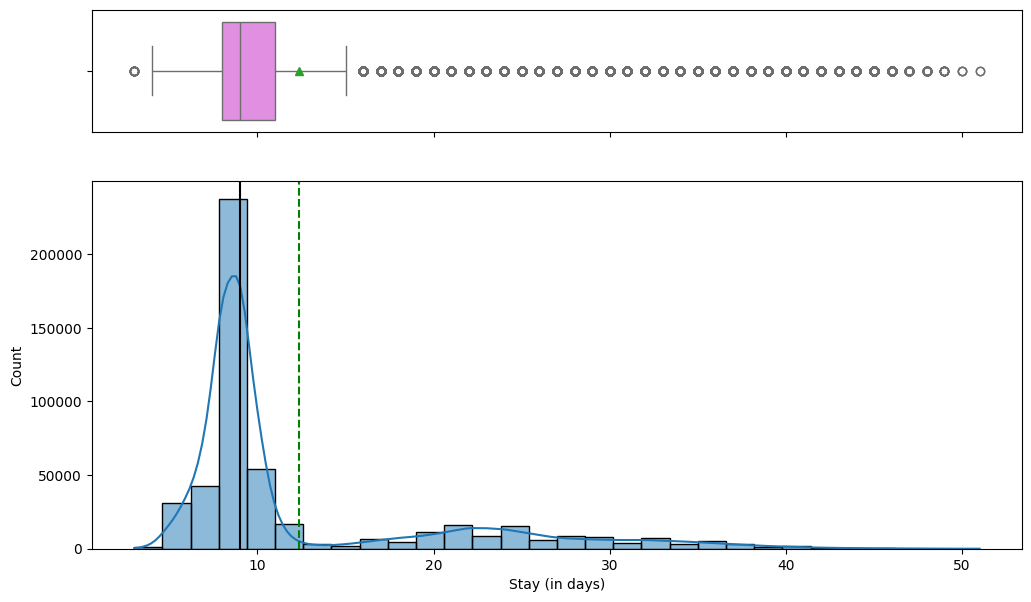

In [20]:
histogram_boxplot(data, "Stay (in days)", kde = True, bins = 30)

**Observations:**

- **Fewer patients are staying more than 10 days in the hospital and very few stay for more than 40 days**. This might be because the majority of patients are admitted for moderate or minor illnesses. 
- The peak of the distribution shows that **most of the patients stay for 8-9 days in the hospital.** 

#### **Admission Deposit**

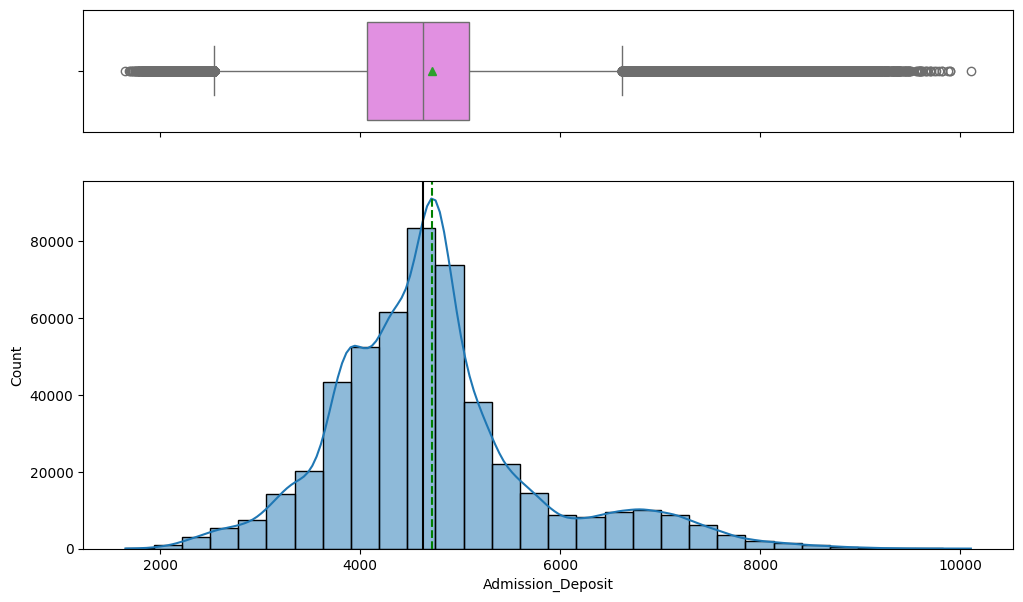

In [21]:
histogram_boxplot(data, "Admission_Deposit", kde = True, bins = 30)

**Observation:**

- The **distribution of admission fees is close to normal with outliers on both sides**. Few patients are paying a high amount of admission fees and few patients are paying a low amount of admission fees.

#### **Visitors with Patients**

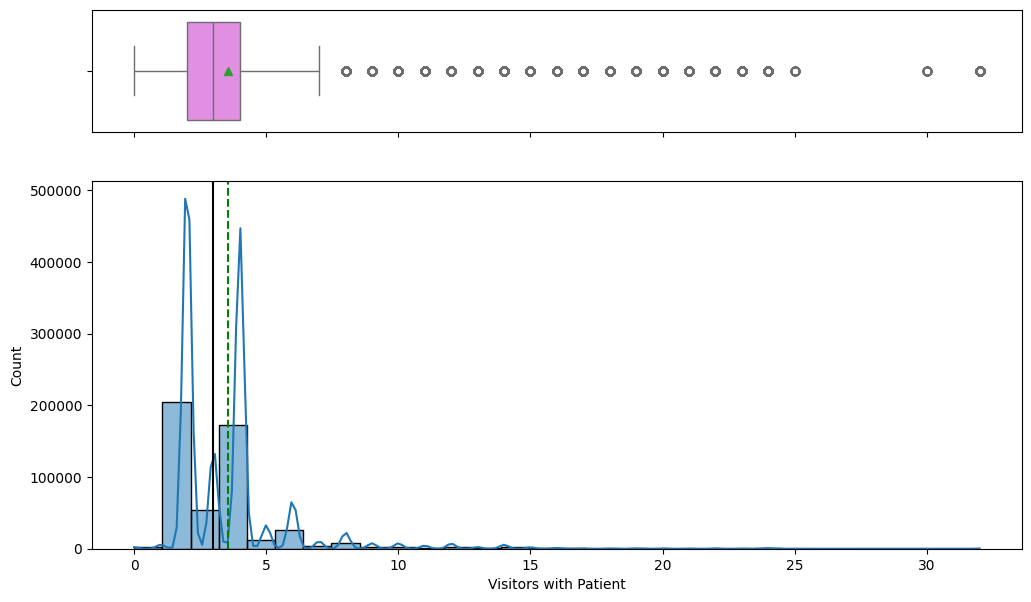

In [24]:
histogram_boxplot(data, "Visitors with Patient", kde = True, bins = 30)

**Observations:**

- The distribution of the number of visitors with the patient is **highly skewed towards the right**.
- **2 and 4 are the most common number of visitors with patients.**

### **Bivariate Analysis**
- Graphical representation of two variables

In [33]:
# # Example of Label Encoding
# from sklearn.preprocessing import LabelEncoder

# label_encoders = {}
# for column in data.select_dtypes(include=[object]).columns:
#     label_encoders[column] = LabelEncoder()
#     data[column] = label_encoders[column].fit_transform(data[column])

# # After encoding, you can calculate the correlation matrix
# correlation_matrix = data.corr()
# Assuming 'gynecology' is the name of the column you want to exclude


<Axes: >

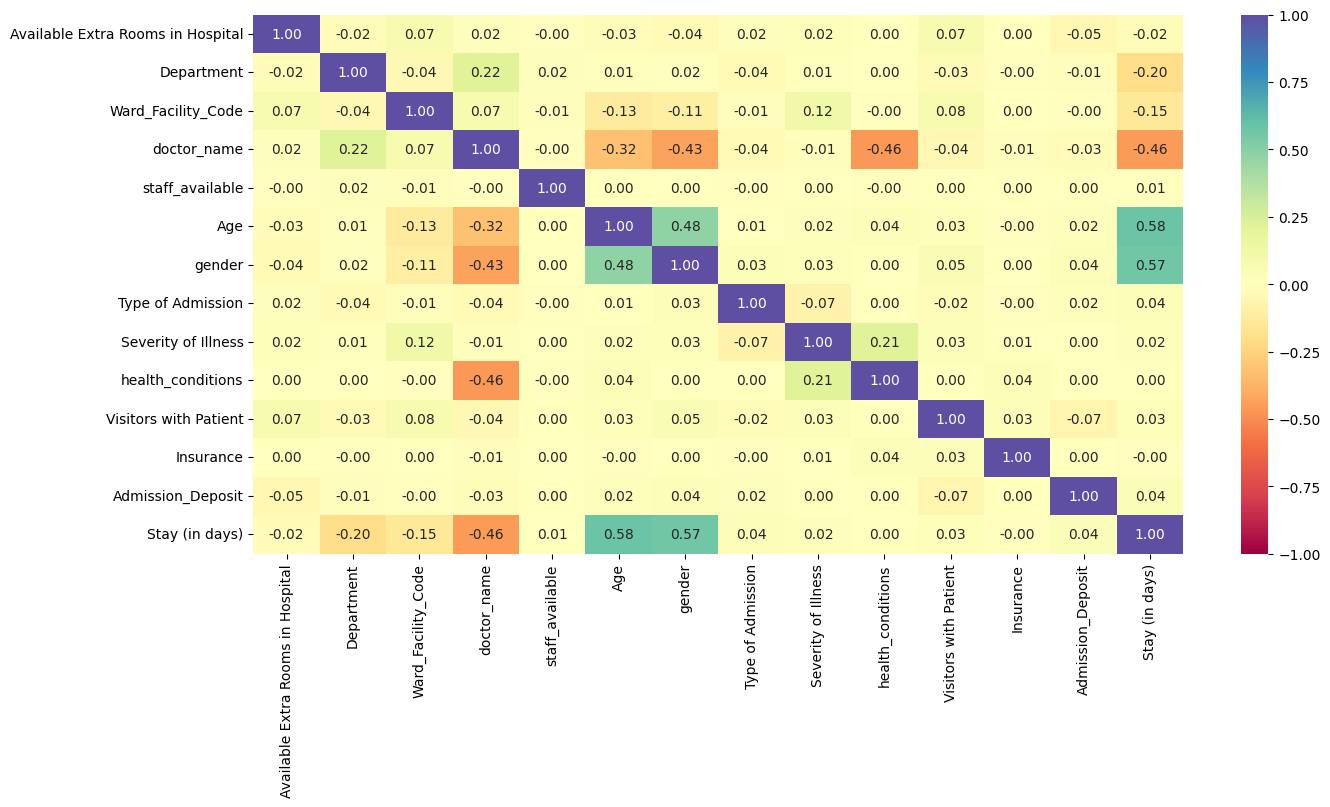

In [35]:
# Finding the correlation between various columns of the dataset
plt.figure(figsize = (15,7))
sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")

**Observations:** 
- The heatmap shows that there is **no correlation between variables**.
- The continuous variables show no correlation with the target variable (Stay (in days)), which indicates that the **categorical variables might be more important for the prediction.**

In [37]:
# Function to plot stacked bar plots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
        by = sorter, ascending = False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(
        by = sorter, ascending = False
    )
    tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 5))
    plt.legend(
        loc = "lower left",
        frameon = False,
    )
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    plt.show()

**Let's start by checking the distribution of the LOS for the various wards**

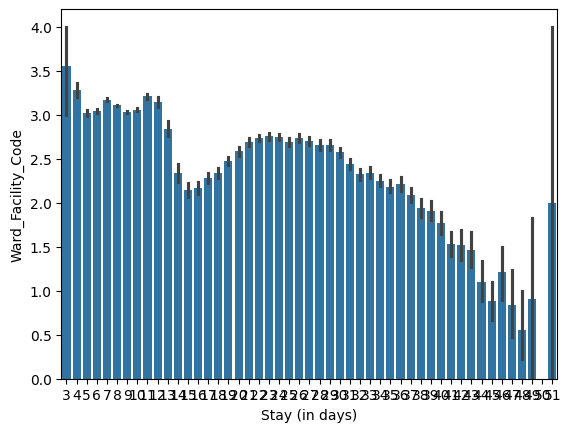

In [38]:
sns.barplot(y = 'Ward_Facility_Code', x = 'Stay (in days)', data = data)
plt.show()

**Observation:**

- The hypothesis we made earlier is correct, i.e., **wards A and C has the patients staying for the longest duration, which implies these wards might be for patients with serious illnesses.**

Department              0      1       2      3     4     All
Ward_Facility_Code                                           
0                    4709  15611       0  21093  5138   46551
All                 22890  44179  343478  84315  5138  500000
1                       0      0  103885      0     0  103885
2                    1319   4199       0   9079     0   14597
3                       0      0  119055      0     0  119055
4                   16862  24369       0  54143     0   95374
5                       0      0  120538      0     0  120538
------------------------------------------------------------------------------------------------------------------------


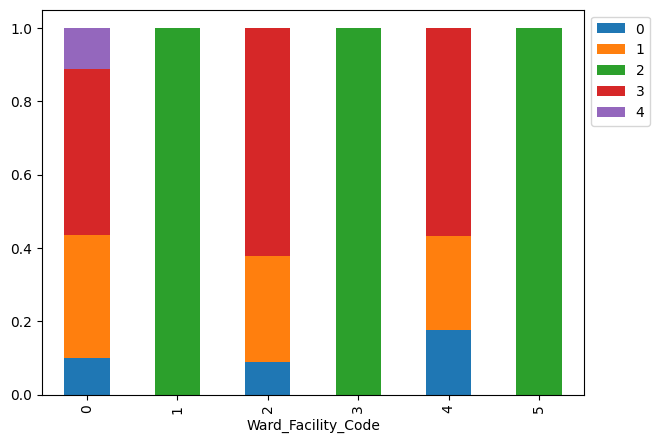

In [39]:
stacked_barplot(data, "Ward_Facility_Code", "Department")

**Observations:**

- **Ward Facility B, D, and F are dedicated only to the gynecology department.**
- Wards A, C, and E have patients with all other diseases, and **patients undergoing surgery are admitted to ward A only.**

**Usually, the more severe the illness, the more the LOS, let's check the distribution of severe patients in various wards.**

Severity of Illness      0       1       2     All
Ward_Facility_Code                                
All                  88266  131537  280197  500000
3                    29549   27220   62286  119055
1                    24222   23579   56084  103885
0                    13662    7877   25012   46551
4                    11488   22254   61632   95374
5                     5842   47594   67102  120538
2                     3503    3013    8081   14597
------------------------------------------------------------------------------------------------------------------------


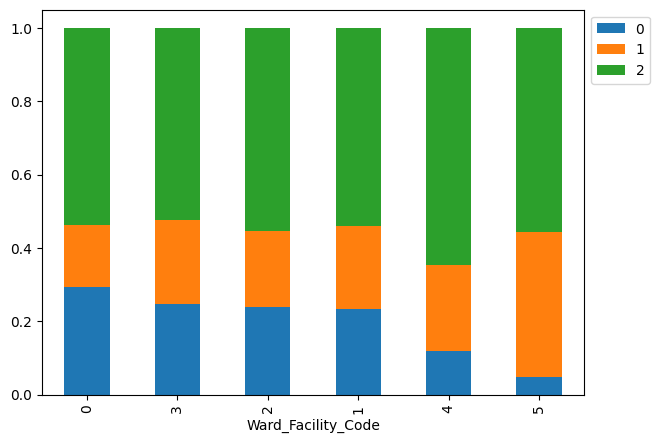

In [40]:
stacked_barplot(data, "Ward_Facility_Code", "Severity of Illness")

**Observations:**

- **Ward A has the highest number of extreme cases.** We observed earlier that ward A has the longest length of stay in the hospital as well. It might require more staff and resources as compared to other wards.
- **Ward F has the highest number of minor cases and Ward E has the highest number of moderate cases.**

**Age can also be an important factor to find the length of stay. Let's check the same.**

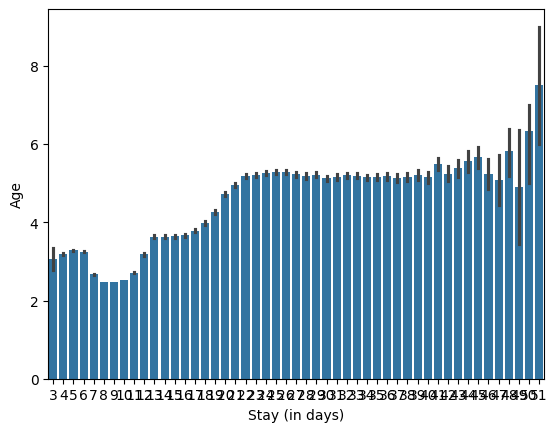

In [41]:
sns.barplot(y = 'Age', x = 'Stay (in days)', data = data)
plt.show()

**Observation:**

- **Patients aged between 1-10 and 51-100 tend to stay the most number of days in the hospital.** This might be because the majority of the patients between the 21-50 age group get admitted to the gynecology department and patients in age groups 1-10 and 5-100 might get admitted due to some serious illness.

**Let's look at the doctors, their department names, and the total number of patients they have treated.**

In [52]:
data.groupby(['doctor_name'])['Department'].agg(Department_Name='unique',Patients_Treated='count')

,Department_Name,Patients_Treated
doctor_name,,
0,[4],3359
1,"[0, 1, 3]",51263
2,"[1, 0]",44410
3,[2],70777
4,[2],98352
5,[3],55711
6,[2],99596
7,[4],1779
8,[2],74753


**Observations:**

- The hospital employs a total of 9 doctors. Four of the doctors work in the department of gynecology, which sees the most patients.
- The majority of patients that attended the hospital were treated by Dr. Sarah and Olivia.
- Two doctors are working in the surgical department (Dr. Isaac and Dr. Simon), while Dr. Sam works in the radiotherapy department.
- The only two doctors who work in several departments are Dr. John and Dr. Mark.

## **Data Preparation for Model Building**

- Before we proceed to build a model, we'll have to encode categorical features.
- Separate the independent variables and dependent Variables.
- We'll split the data into train and test to be able to evaluate the model that we train on the training data.

In [48]:
# Creating dummy variables for the categorical columns
# drop_first=True is used to avoid redundant variables
data = pd.get_dummies(
    data,
    columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In [49]:
# Check the data after handling categorical data
data

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,2,3,8,0,4,0,1,0,1,4,1,2966.408696,8
1,4,2,1,8,2,3,0,1,1,2,2,0,3554.835677,9
2,2,2,1,8,8,2,0,1,0,1,2,1,5624.733654,7
3,4,2,3,4,7,3,0,2,2,5,4,0,4814.149231,8
4,2,1,4,2,10,7,1,1,2,1,2,0,5169.269637,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,4,2,5,6,2,1,0,1,1,3,3,0,4105.795901,10
499996,13,2,5,4,8,3,0,0,2,4,2,0,4631.550257,11
499997,2,2,1,6,3,1,0,0,2,3,2,0,5456.930075,8
499998,2,3,0,1,1,6,0,1,0,1,2,0,4694.127772,23


In [53]:
# Separating independent variables and the target variable
x = data.drop('Stay (in days)',axis=1)

y = data['Stay (in days)'] 

In [54]:
# Splitting the dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)

In [55]:
# Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (400000, 13)
Shape of test set :  (100000, 13)


## **Model Building**

* We will be using different metrics functions defined in sklearn like RMSE, MAE, 𝑅2, Adjusted 𝑅2, and MAPE for regression models evaluation. We will define a function to calculate these metric.
* The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average of absolute percentage error for all data points. The absolute percentage error is defined as predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

In [46]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [56]:
import statsmodels.api as sm

# Statsmodel API does not add a constant by default. We need to add it explicitly.
x_train1 = sm.add_constant(x_train)

# Add constant to test data
x_test1 = sm.add_constant(x_test)

# Train the model
olsmodel1 = sm.OLS(y_train, x_train1).fit()

# Get the model summary
olsmodel1.summary()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:         Stay (in days)   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                 3.463e+04
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:52:54   Log-Likelihood:            -1.2439e+06
No. Observations:              400000   AIC:                         2.488e+06
Df Residuals:                  399986   BIC:                         2.488e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [57]:
lin_reg_test = model_performance_regression(olsmodel1, x_test1, y_test)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.42745,3.591297,0.532229,0.532163,32.691213


**Observations:**

- We can observe that `R-squared` for the model is `~0.84`. 
- Not all the variables are statistically significant enough to predict the outcome variable. To check which ones are statistically significant or have enough predictive power to predict the target variable, we check the `p-value` for all the independent variables. Independent variables with a p-value of higher than 0.05 are not significant for the 95% confidence level.

**Interpreting the Regression Results:**

1. **Adjusted R-squared**: It reflects the fit of the model.
    - R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for Adj. R-squared is **0.84**

2. **coef**: It represents the change in the output Y due to a change of one unit in the variable (everything else held constant).
3. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the more accurate the coefficients are.
4. **P > |t|**: The p-value:
   
   * Pr(>|t|): For each independent feature there is a null hypothesis and an alternate hypothesis 

    **Ho:** Null Hypothesis - The independent feature is not significant 
   
    **Ha:** Alternate Hypothesis - The independent feature is significant 
    
   * A p-value of less than 0.05 is considered to be statistically significant.

   
5. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).



* Both the **R-squared and Adjusted R-squared of the model are around 84%**. This is a clear indication that we have been able to create a good model that can explain variance in the LOS of patients for up to 84%.

* We can examine the significance of the regression model, and try dropping insignificant variables.

In [58]:
print("Performance on train data: ")
model_performance_regression(olsmodel1, x_train1, y_train)

Performance on train data: 


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.423693,3.583987,0.529557,0.52954,32.565684


In [59]:
print("Performance on test data: ")
model_performance_regression(olsmodel1, x_test1, y_test)

Performance on test data: 


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.42745,3.591297,0.532229,0.532163,32.691213


**Observations:**

- **The Root Mean Squared Error** of train and test data are **very close**, indicating that **our model is not overfitting** to the training data.

- Mean Absolute Error (MAE) indicates that the current model can predict LOS of patients within **mean error of 2.15 days** on the test data.

- The units of both RMSE and MAE are the same - days in this case. But RMSE is greater than MAE because it penalizes the outliers more.

- **Mean Absolute Percentage Error is ~19%** on the test data, indicating that the average difference between the predicted value and the actual value is ~19%.

### **Checking for Multicollinearity**

**Multicollinearity** occurs when **independent variables** in a regression model are **highly correlated** to each other, such that they do not provide **unique** or independent information. A regression coefficient is interpreted as the mean change in the target for each unit change in a feature when all other characteristics are held constant. Changes in one aspect can affect other features when they are correlated. The stronger the relationship, the more difficult it is to change one element without affecting the others. Because the features tend to change concurrently, it becomes difficult for the model to evaluate the link between each variable and the target individually.

**Variation Inflation Factor (VIF)** is one of the most common ways of detecting multicollinearity in data. The Variation Inflation Factor (VIF) is one of the most common methods for detecting multicollinearity in data. The VIF calculates how much the variance of a regression coefficient is inflated due to model multicollinearity. 

The VIF can be calculated in two steps,
*   Choose and execute a regression analysis on an independent variable for which you are attempting to calculate VIF. For example, suppose there are three independent variables X1, X2, and X3, and a target variable Y. If we wish to calculate VIF for the variable X1, we use X1 as the target variable and X2 and X3 as independent variables **(X1=b0+b1.X2+b2.X3)**.
* The regression model mentioned above gives us R2 squared. The formula below is used to calculate the VIF using R2.

> ![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/vif.jpg)

Variance inflation factor (VIFs) tells **"what percentage of the variance is inflated for each coefficient"**. For example, a VIF of 1.7 tells you that the variance of a particular coefficient is 70% bigger than what you would expect if there was no multicollinearity, i.e., if there was no correlation with other predictors. 

Usually, features having a VIF score greater than 5 are dropped/treated till all the features have a VIF score of less than 5.

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


In [61]:
print(checking_vif(x_train1))

                              feature        VIF
0                               const  67.427325
1   Available Extra Rooms in Hospital   1.014338
2                          Department   1.099970
3                  Ward_Facility_Code   1.049962
4                         doctor_name   1.903911
5                     staff_available   1.000345
6                                 Age   1.341344
7                              gender   1.578410
8                   Type of Admission   1.009229
9                 Severity of Illness   1.092721
10                  health_conditions   1.489622
11              Visitors with Patient   1.021833
12                          Insurance   1.002838
13                  Admission_Deposit   1.009172


- All the continuous variables have VIF less than 5, which makes sense according to what we observed in correlation heatmap.

**Note:** It is not a good practice to consider VIF values for dummy variables as they are correlated to other categories and hence have a high VIF usually. In such a case, we can check the p-values of coefficients.

## **Dropping the insignificant variables and creating the regression model again**

### **Examining the significance of the model**

It is not enough to just fit a multiple regression model to the data, it is also necessary to check whether all the regression coefficients are significant or not. The significance here means whether the population regression parameters are significantly different from zero.

From the above, it may be noted that the regression coefficients corresponding to staff_available, Visitors with Patient, and Insurance_Yes **are not statistically significant at significance level α = 0.05.** In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population. 

Suppose you have a nominal categorical variable having 4 categories (or levels). You would create 3 dummy variables (k-1 = 4-1 dummy variables) and set one category as a reference level. Suppose one of them is insignificant, then if you exclude that dummy variable, it would change the reference level as you are indirectly combining that insignificant level with the original reference level. It would have a new reference level and interpretation would change. Moreover, excluding the level may make the others insignificant. If all the categories in a column show p-value higher than 0.05, then we can drop that column.

**Hence, we will eliminate these three features and create a new model.**

In [65]:
# Dropping variables
#x_train2 = x_train1.drop(['Insurance_Yes','staff_available','Visitors with Patient'], axis = 1)
#x_test2 = x_test1.drop(['Insurance_Yes','staff_available','Visitors with Patient'], axis = 1)


x_train2 = x_train1.drop(['staff_available','Visitors with Patient'], axis = 1)
x_test2 = x_test1.drop(['staff_available','Visitors with Patient'], axis = 1)


# Train the model
olsmodel2 = sm.OLS(y_train, x_train2).fit()

# Get the model summary
olsmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Stay (in days)   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                 4.091e+04
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:03:18   Log-Likelihood:            -1.2439e+06
No. Observations:              400000   AIC:                         2.488e+06
Df Residuals:                  399988   BIC:                         2.488e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                14.1981      0.068    210.260      0.000      14.066      14.330
Available Extra Rooms in Hospital     0.0227      0.003      7.123      0.000       0.016       0.029
Department                           -1.8866      0.013   -145.514      0.000      -1.912      -1.861
Ward_Facility_Code                   -0.2971      0.005    -57.225      0.000      -0.307      -0.287
doctor_name                          -0.8543      0.005   -155.659      0.000      -0.865      -0.844
Age                                   1.7893      0.006    293.469      0.000       1.777       1.801
gender                                4.0275      0.019    210.335      0.000       3.990       4.065
Type of Admission                     0.1747      0.015     12.031      0.000       0.146       0.203
Severity of Illness                   0.4437      0.012     38.011      0.000       0.421       0.467
health_conditions                    -0.5701      0.006    -98.105      0.000      -0.582      -0.559
Insurance                             0.0355      0.021      1.698      0.089      -0.005       0.076
Admission_Deposit                     0.0001   8.21e-06     17.459      0.000       0.000       0.000
==============================================================================
Omnibus:                    82493.439   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           342554.566
Skew:                           0.971   Prob(JB):                         0.00
Kurtosis:                       7.097   Cond. No.                     3.84e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### **Checking the performance of the model on the train and test datasets**

In [66]:
print("Performance on train data: ")
model_performance_regression(olsmodel2, x_train2, y_train)

Performance on train data: 


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.424311,3.585273,0.529449,0.529435,32.582215


In [67]:
print("Performance on test data: ")
lin_reg_test = model_performance_regression(olsmodel2, x_test2, y_test)
lin_reg_test

Performance on test data: 


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.428136,3.592633,0.532111,0.532054,32.707517


**Observation:**

* RMSE, MAE, and MAPE of train and test data are very close, indicating that the **model is not overfitting and has generalized well over the unseen data.**

## **Checking for assumptions and rebuilding the model**

In this step, we will check for the below assumptions in the model, to verify if they hold true or not. If the assumptions of model are not satisfied, then the model might give false results. Hence, if any of the assumptions is not true, then we will rebuild the model after fixing those issues.

1. Mean of residuals should be 0
2. Normality of error terms
3. Linearity of variables
4. No Heteroscedasticity

### **Mean of residuals should be 0 and normality of error terms**

In [68]:
# Residuals
residual = olsmodel2.resid 

In [69]:
residual.mean()

7.449010297477798e-14

- The mean of residuals is very close to 0. Hence, the corresponding assumption is satisfied.

## **Tests for Normality**

**What is the test?**

* Error terms/Residuals should be normally distributed.

* If the error terms are non-normally distributed, confidence intervals may become too wide or narrow. Once the confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on the minimization of least squares.

**What does non-normality indicate?**

* It suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check the normality?**

* It can be checked via QQ Plot. Residuals following normal distribution will make a straight line plot otherwise not.

* Another test to check for normality is the Shapiro-Wilk test.

**What if the residuals are not-normal?**

* We can apply transformations like a log, exponential, arcsinh, etc. as per our data.

<Axes: ylabel='Count'>

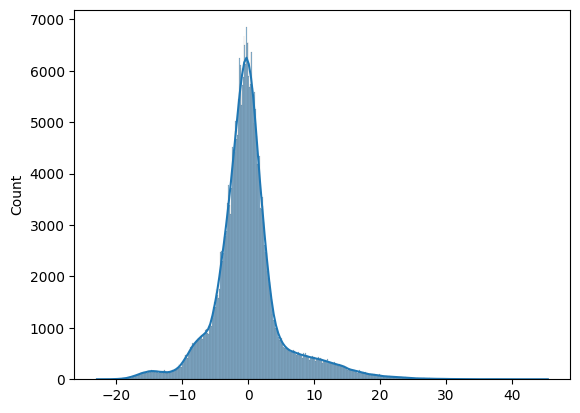

In [70]:
# Plot histogram of residuals
sns.histplot(residual, kde=True)

- The residuals have a close to normal distribution. The assumption of normality is satisfied.

### **Linearity of Variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

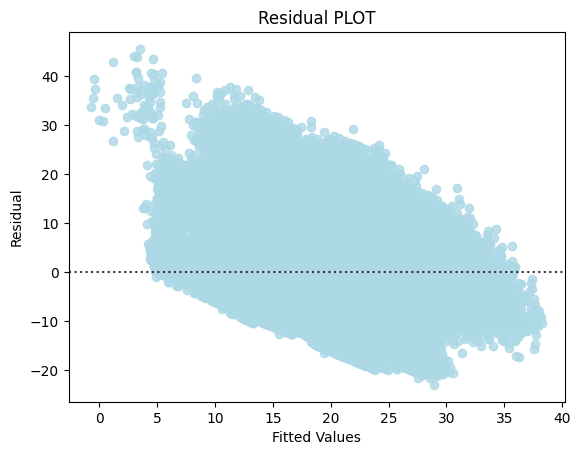

In [71]:
# Predicted values
fitted = olsmodel2.fittedvalues

# Plotting Residuals VS Fitted Values
sns.residplot(x = fitted, y = residual, color="lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

**Observation:**

- We can observe that there is no pattern in the residuals vs fitted values scatter plot, i.e., the linearity assumption is satisfied.

Now, let's check the final assumption.

### **No Heteroscedasticity**

* **Homoscedasticity:** If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedasticity:** If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form an arrow shape or any other non-symmetrical shape.

* We will use `Goldfeld–Quandt` test to check homoscedasticity:

    * **Null hypothesis:** Residuals are homoscedastic

    * **Alternate hypothesis:** Residuals are hetroscedastic

    * **alpha = 0.05**

In [72]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residual, x_train2)
lzip(name, test)

[('F statistic', 1.0047623431536914), ('p-value', 0.1440427379818421)]

**Observation:**

- As we can observe from the above test, the p-value is greater than 0.05. So, we fail to reject the null-hypothesis, i.e., residuals are homoscedastic.

All the assumptions for the linear regression model are satisfied. With our model's adjusted R-squared value of around 0.84, we can capture **84% of the variation** in the data.

The p-values for the independent variables are less than 0.05 in our final model, indicating that they are statistically significant toward Length of Stay (in days) prediction.

Now, let's check and interpret the coefficients of the model.

In [73]:
coef = olsmodel2.params
coef

const                                14.198148
Available Extra Rooms in Hospital     0.022749
Department                           -1.886639
Ward_Facility_Code                   -0.297111
doctor_name                          -0.854320
Age                                   1.789344
gender                                4.027534
Type of Admission                     0.174659
Severity of Illness                   0.443706
health_conditions                    -0.570135
Insurance                             0.035503
Admission_Deposit                     0.000143
dtype: float64

In [74]:
# Let us write the equation of the model
Equation = "Stay (in days)="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

Stay (in days)=	( 14.198148486721315 ) *  const + ( 0.022748595769646822 ) *  Available Extra Rooms in Hospital + ( -1.8866394910426518 ) *  Department + ( -0.2971114348524951 ) *  Ward_Facility_Code + ( -0.8543204095521302 ) *  doctor_name + ( 1.7893438145275296 ) *  Age + ( 4.02753358842768 ) *  gender + ( 0.1746586744159254 ) *  Type of Admission + ( 0.4437059385618307 ) *  Severity of Illness + ( -0.5701350411001121 ) *  health_conditions + ( 0.03550293385692713 ) *  Insurance + ( 0.00014326399202891455 ) *  Admission_Deposit + 

### **Interpreting the Regression Coefficients**

* The Stay (in days) decreases with an increase in Department_radiotherapy. 1 unit increase in the Department_radiotherapy leads to a decrease of Stay (in days) ~ 4.62 times the Stay (in days) than the Department_TB&Chest_Disease that serves as a reference variable when everything else is constant.

* The Stay (in days) increases with an increase in Department_anesthesia. 1 unit increase in Department_anesthesia leads to an increase of Stay (in days) ~ 6.08 times the Stay (in days) than the Department_TB&Chest_Disease that serves as a reference variable when everything else is constant. This is understandable, as anesthesia is used in severe cases which results in more days of stay.

* The Stay (in days) increases with an increase in Department_surgery. 1 unit increase in Department_surgery leads to an increase of Stay (in days) ~ 9.68 times the Stay (in days) than the Department_TB&Chest_Disease that serves as a reference variable when everything else is constant. This is understandable, as surgery is conducted in severe cases which results in more days of stay.

* The Stay (in days) increases with an increase in doctor_name_Dr Simon. 1 unit increase in doctor_name_Dr Simon leads to an increase of Stay (in days) ~ 6.14 times the Stay (in days) than the doctor_name_Dr Isaac that serves as a reference variable when everything else is constant. This is understandable, as surgery cases are handled by Dr. Simon.

## Next Steps

- We have explored building a Linear Regression model for this problem statement of predicting the likely length of stay of a patient for a hospital visit, and we've also verified that the assumptions of Linear Regression are being satisfied, to make our final model statistically correct to draw inferences from.
- However, being a linear model, it is more interpretable than a model with high predictive power. The performance metrics of our attempt at prediction can be improved with more complex and non-linear models.
- In the coming section, we will explore building models on more complex regularized versions of Linear Regression, and also get into non-linear tree-based regression models, to see if we can improve on the model's predictive performance.